In [8]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


def data_prep_reg(csv_f_name='train.csv'):

    df_train = pd.read_csv(csv_f_name)
    print (df_train.columns)
    df_train['SalePrice'].describe()
    #histogram
    sns.distplot(df_train['SalePrice']);
    # In[13]:

    #skewness and kurtosis
    print("Skewness: %f" % df_train['SalePrice'].skew())
    print("Kurtosis: %f" % df_train['SalePrice'].kurt())


    # In[14]:

    #scatter plot grlivarea/saleprice
    var = 'GrLivArea'
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


    # In[15]:

    #scatter plot totalbsmtsf/saleprice
    var = 'TotalBsmtSF'
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


    # In[16]:

    #box plot overallqual/saleprice
    var = 'OverallQual'
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);


    # In[17]:

    var = 'YearBuilt'
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);


    # In[18]:

    #correlation matrix
    corrmat = df_train.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat, vmax=.8, square=True);


    # In[19]:

    #saleprice correlation matrix
    k = 10 #number of variables for heatmap
    cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
    cm = np.corrcoef(df_train[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()


    # In[20]:

    #scatterplot
    sns.set()
    cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
    sns.pairplot(df_train[cols], size = 2.5)
    plt.show();


    # In[21]:

    #missing data
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)


    # In[22]:

    #dealing with missing data
    df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
    deleted_variables = (missing_data[missing_data['Total'] > 1]).index
    #df_train.isnull().sum().max() #just checking that there's no missing data missing...


    # In[23]:

    #standardizing data
    saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
    low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
    high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
    print('outer range (low) of the distribution:')
    print(low_range)
    print('\nouter range (high) of the distribution:')
    print(high_range)


    # In[24]:

    #bivariate analysis saleprice/grlivarea
    var = 'GrLivArea'
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


    # In[25]:

    #deleting points
    df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
    df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
    df_train = df_train.drop(df_train[df_train['Id'] == 524].index)


    # In[26]:

    #bivariate analysis saleprice/grlivarea
    var = 'TotalBsmtSF'
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


    # In[27]:

    #histogram and normal probability plot
    sns.distplot(df_train['SalePrice'], fit=norm);
    fig = plt.figure()
    res = stats.probplot(df_train['SalePrice'], plot=plt)


    # In[29]:

    #applying log transformation
    df_train['SalePrice'] = np.log(df_train['SalePrice'])


    # In[30]:

    #transformed histogram and normal probability plot
    sns.distplot(df_train['SalePrice'], fit=norm);
    fig = plt.figure()
    res = stats.probplot(df_train['SalePrice'], plot=plt)


    # In[31]:

    #histogram and normal probability plot
    sns.distplot(df_train['GrLivArea'], fit=norm);
    fig = plt.figure()
    res = stats.probplot(df_train['GrLivArea'], plot=plt)


    # In[32]:

    #data transformation
    df_train['GrLivArea'] = np.log(df_train['GrLivArea'])


    # In[33]:

    #transformed histogram and normal probability plot
    sns.distplot(df_train['GrLivArea'], fit=norm);
    fig = plt.figure()
    res = stats.probplot(df_train['GrLivArea'], plot=plt)


    # In[34]:

    #convert categorical variable into dummy
    labels = df_train.SalePrice
    df_train.drop('SalePrice',1)
    df_train = pd.get_dummies(df_train)

    df_train.fillna(df_train.mean())
    # In[44]:

    print df_train.shape
    return df_train, deleted_variables, labels

In [9]:
def data_prep_reg_test(deleted_variables = [], csv_f_name='test.csv'):

    df_test = pd.read_csv(csv_f_name)

    #dealing with missing data
    df_test = df_test.drop(deleted_variables,1)
    #df_test.isnull().sum().max() #just checking that there's no missing data missing...

    #data transformation
    df_test['GrLivArea'] = np.log(df_test['GrLivArea'])


    #create column for new variable (one is enough because it's a binary categorical feature)
    #if area>0 it gets 1, for area==0 it gets 0
    df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)
    df_test['HasBsmt'] = 0 
    df_test.loc[df_test['TotalBsmtSF']>0,'HasBsmt'] = 1


    #transform data
    df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

    df_test = pd.get_dummies(df_test)
    df_test.fillna(df_test.mean())


    # In[44]:

    print df_test.shape
    return df_test

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

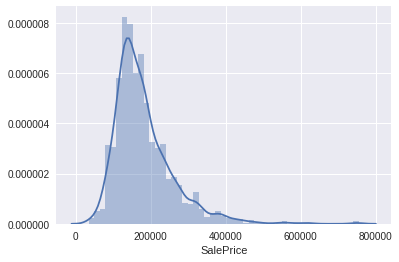

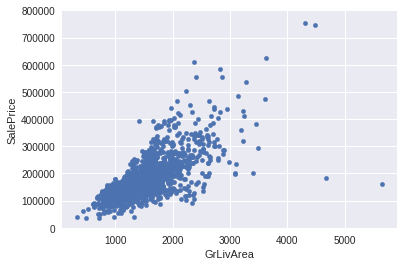

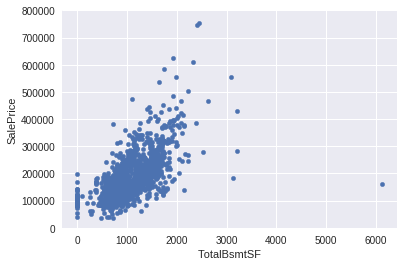

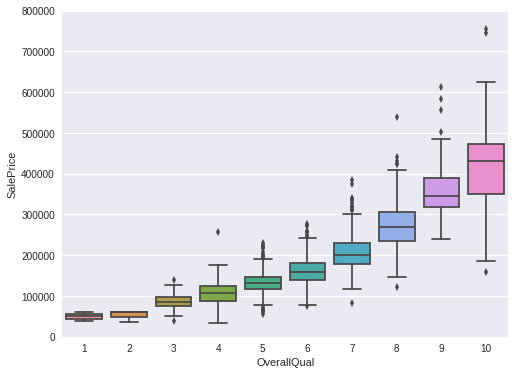

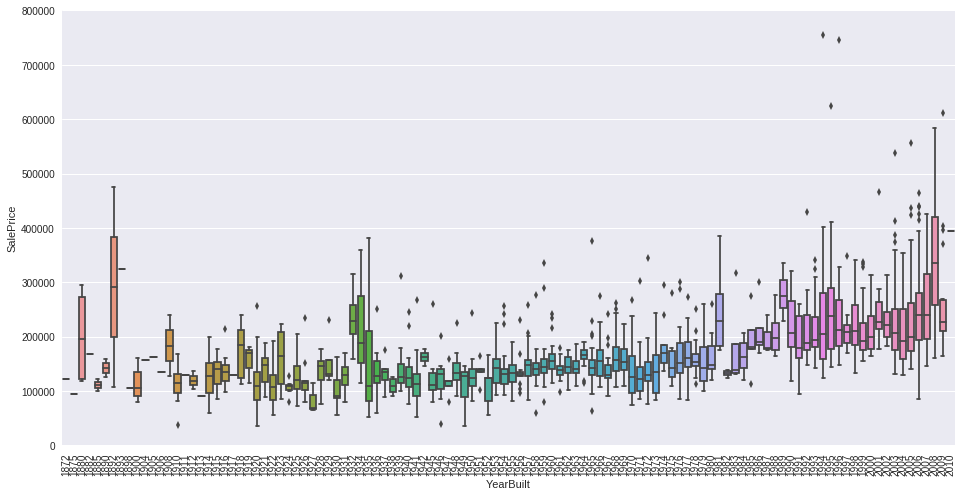

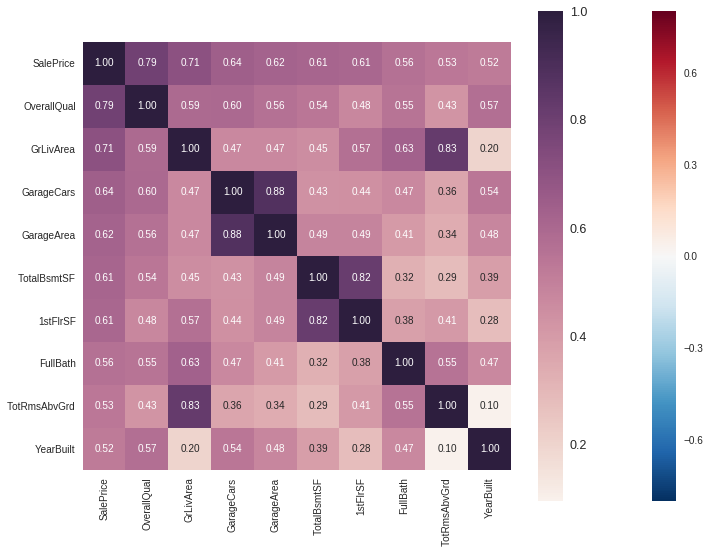

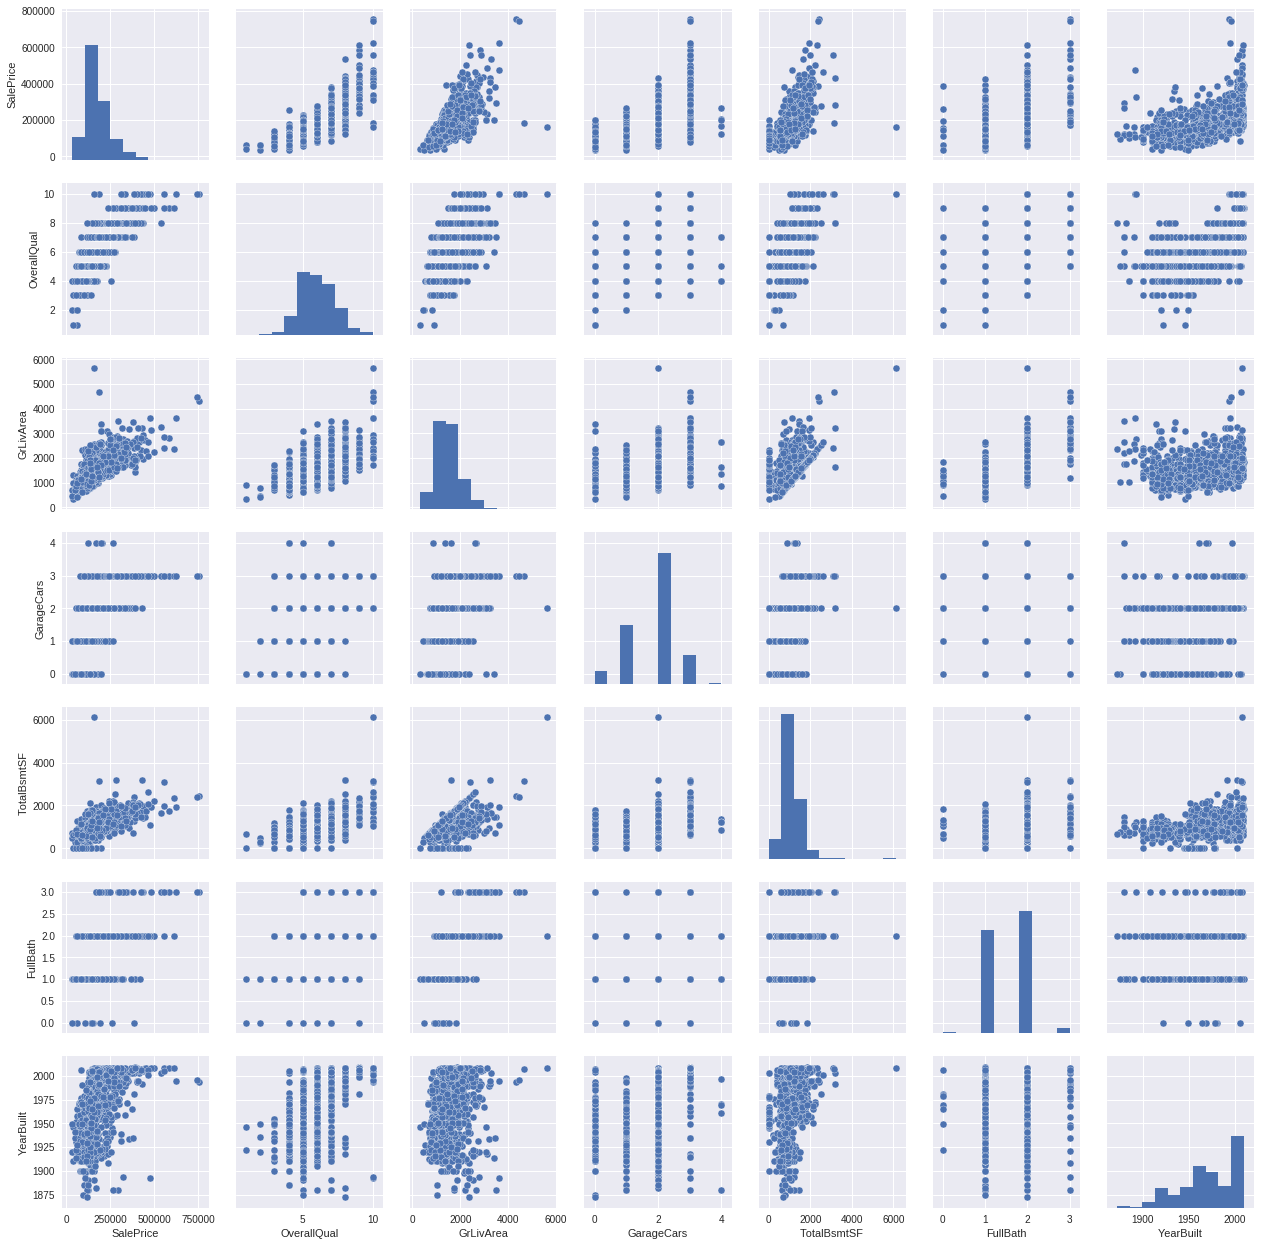

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[ 3.82897043]
 [ 4.04098249]
 [ 4.49634819]
 [ 4.71041276]
 [ 4.73032076]
 [ 5.06214602]
 [ 5.42383959]
 [ 5.59185509]
 [ 7.10289909]
 [ 7.22881942]]
(1458, 221)
(1459, 207)


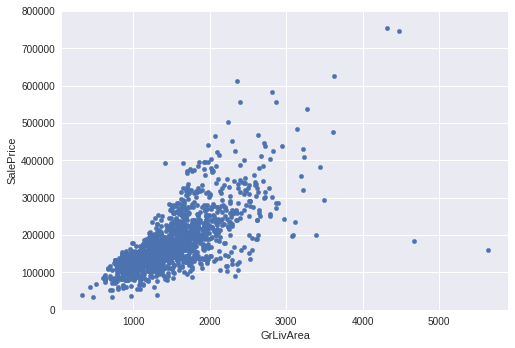

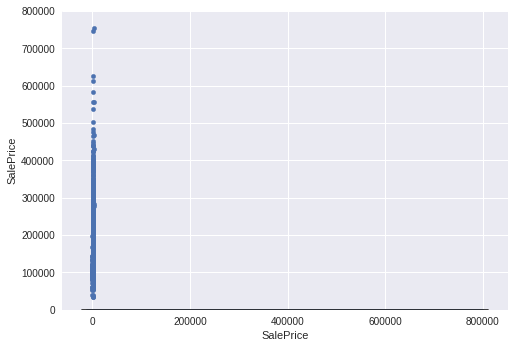

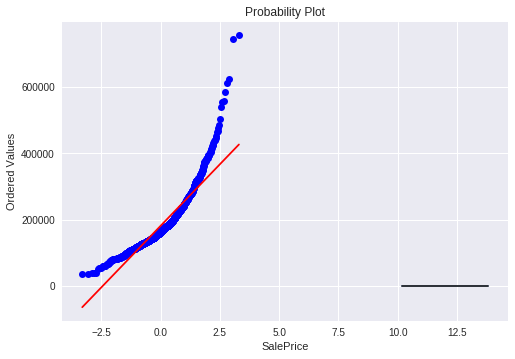

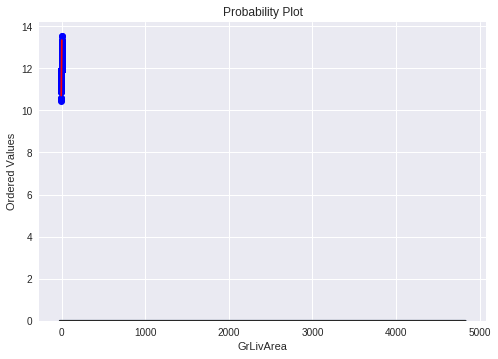

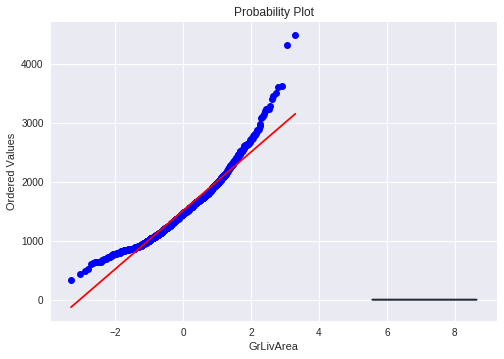

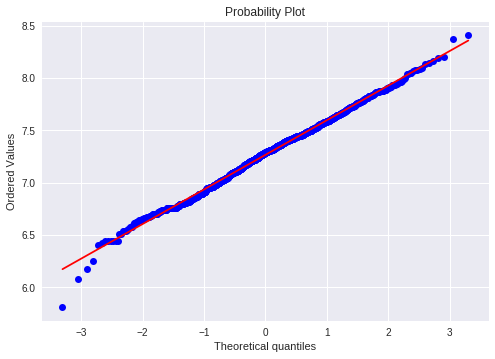

In [10]:
X_train, deleted_variables, y = data_prep_reg('train.csv')
X_test = data_prep_reg_test(deleted_variables, 'test.csv')

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [ ]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

In [ ]:
print X_test.shape
print X_train.shape

In [ ]:
xgb_preds = model_xgb.predict(X_test)

In [ ]:
X_train.columns

In [ ]:
print pd.read_csv('train.csv').shape
print pd.read_csv('test.csv').shape